# Movie Data Analysis
Using Python, Numpy, Pandas, Matplotlib and Seaborn!

## Step 1: Imports and Reading Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime as dt
from dateutil.parser import parse


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)


# Read in the data
df = pd.read_csv('Data/movies.csv')

## Step 2: Data Exploration
- Dataframe `shape`
- `head` and `tail`
- `dtypes`, `describe`, `columns`
- Checked for missing/null data
- Identified duplicated columns

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
df.shape

(7668, 15)

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [9]:
# Check for missing data (Sum)
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
# Check for missing data (Percentage)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [11]:
# Check the release column for the Missing data 
df[df['released'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check for duplicate Movies
df.loc[df.duplicated(subset=['name', 'director'])]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


## Step 3: Data Cleaning
Summary:
- Changed Data Types of Columns
- Filled in NAN columns with 0
- Split original columns into more meaningful columns
- Removed uncessary character spaces
- Converted Released column into a standardized date time format
- Dropped irrelevant columns
- Renamed and Re-ordered columns

In [13]:
# Change Data Type of Columns & Fill NAN collumns with 0
df['released'] = df['released'].astype(str)
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [14]:
# Split Released column into 2 separete column's of Released and Country
df[['released_corrected', 'country_corrected']] = df['released'].str.split('(',  expand=True)

In [15]:
# Using newly created released column we create a year column
df['year_corrected'] = df['released_corrected'].str.split("(").str[0].str.rstrip(" ").str[-4:]

In [16]:
# Clean up newly created Release column
df['released_corrected'] = df['released_corrected'].str.rstrip(" ")

In [17]:
# Clean up newly created Country column
df['country_corrected'] = df['country_corrected'].str.replace(")", "")

In [18]:
def parse_date(date_str):
    try:
        try:
            # try to parse the date string as "February 12, 1982"
            return parse(date_str).strftime('%m-%d-%Y')
        except ValueError:
            try:
                # try to parse the date string as "February 1982"
                return parse('01 ' + date_str).strftime('%m-%d-%Y')
            except ValueError:
                # parse the date string as "1982"
                return parse('01 January, ' + date_str).strftime('%m-%d-%Y')
    except ValueError:
        return parse('01 January, 2000').strftime('%m-%d-%Y')
        
        
df['released_corrected'] = df['released_corrected'].apply(parse_date)

In [19]:
# Convert into a Date Time Object
df['released_corrected'] = pd.to_datetime(df['released_corrected'])

In [20]:
# Drop Year column as we will be replacing with year_corrected
df = df.drop(['year','country', 'released'], axis=1)

In [21]:
# Rename columns
df = df.rename(columns={
       'year_corrected':'year',
       'released_corrected':'released',
       'country_corrected':'country',
})

In [22]:
# Re-Order columns back into original order
df = df.reindex(columns=['name', 'rating', 'genre', 'year', 'released', 'country', 'score', 'votes', 'director', 'writer',
       'star', 'budget', 'gross', 'company', 'runtime'])

## Step 3: Extract Cleaned Data
- To access the source data as quickly and efficiently as possible

In [23]:
df.to_csv('Data/cleaned_movies.csv', index=False)

## Step 4: Data Analysis

Predictions of what impacts movies with the highest gross amounts:
- Predict Budget and Company will have a high correlation 

In [24]:
# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,country,score,votes,director,writer,star,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,United States,7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,United States,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,United States,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,United States,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,United States,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1990,1990-01-26,United States,4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,1989-04-14,United States,5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,1989-04-07,United States,6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,NaN,Comedy,1990,1990-01-13,Japan,7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,0,0,Budapest Stúdió Vállalat,104


<Axes: >

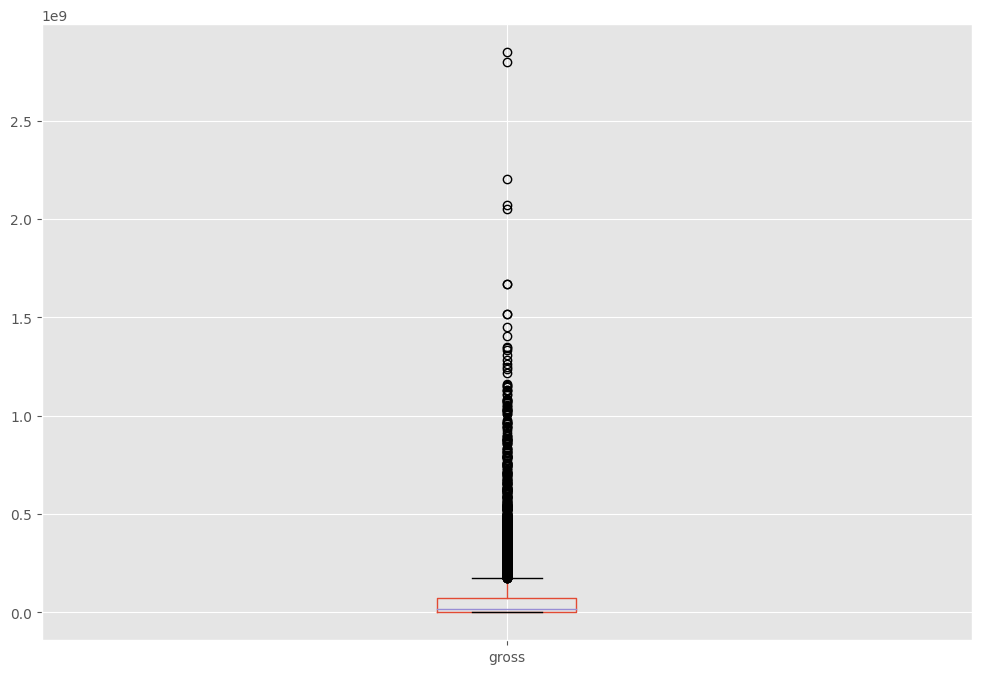

In [25]:
# Are there any Outliers?
df.boxplot(column=['gross'])

<Axes: xlabel='gross', ylabel='budget'>

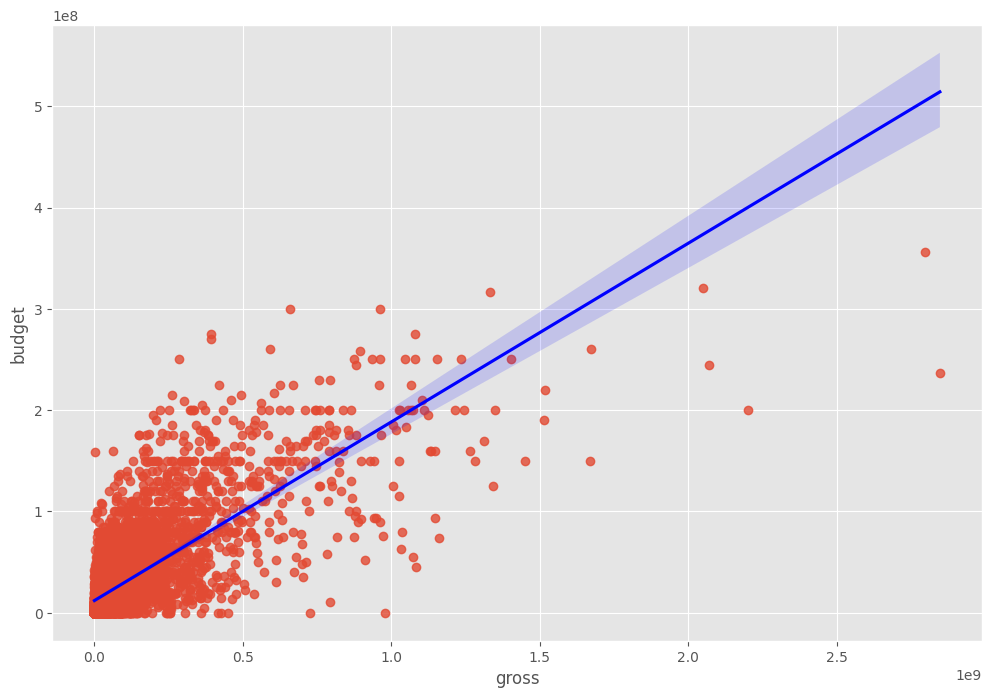

In [26]:
# Linear Regression Plot for Gross and Budget
sns.regplot(x="gross", y="budget", data=df, line_kws={"color":"blue"})

<Axes: xlabel='score', ylabel='gross'>

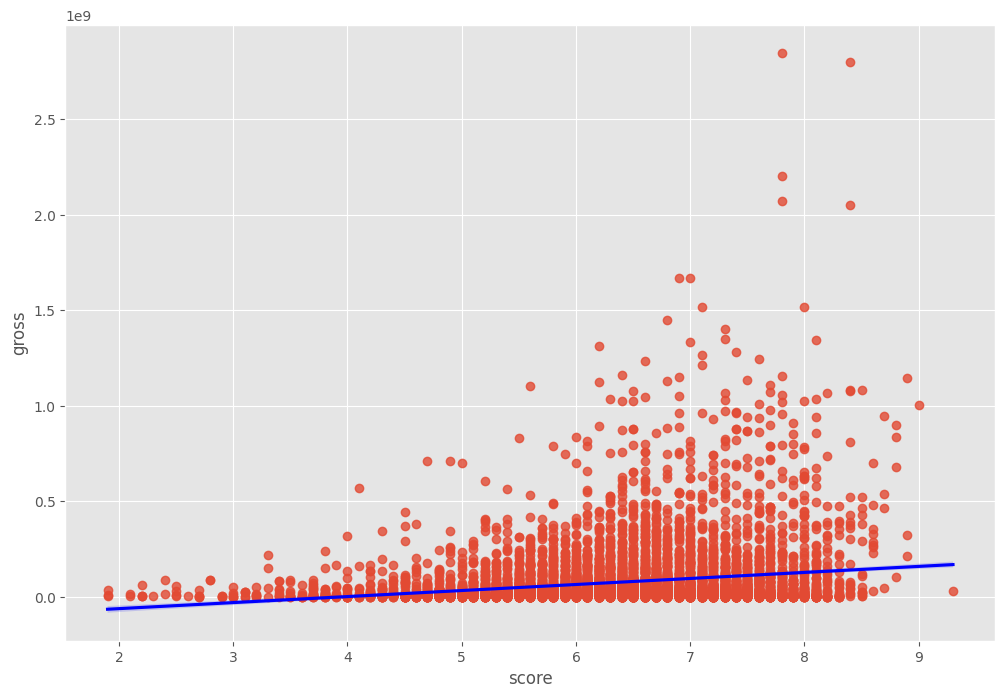

In [27]:
# Linear Regression Plot for Gross and Score
sns.regplot(x="score", y="gross", data=df, line_kws={"color":"blue"})

In [28]:
# Looking at the top 15 compaies by gross revenue
CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [29]:
# Correlation Matrix between Numeric Features Only(Pearson, Kendall, Spearman)
df.corr(numeric_only='True')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.398387,0.306984,0.268372,0.244339,1.000000


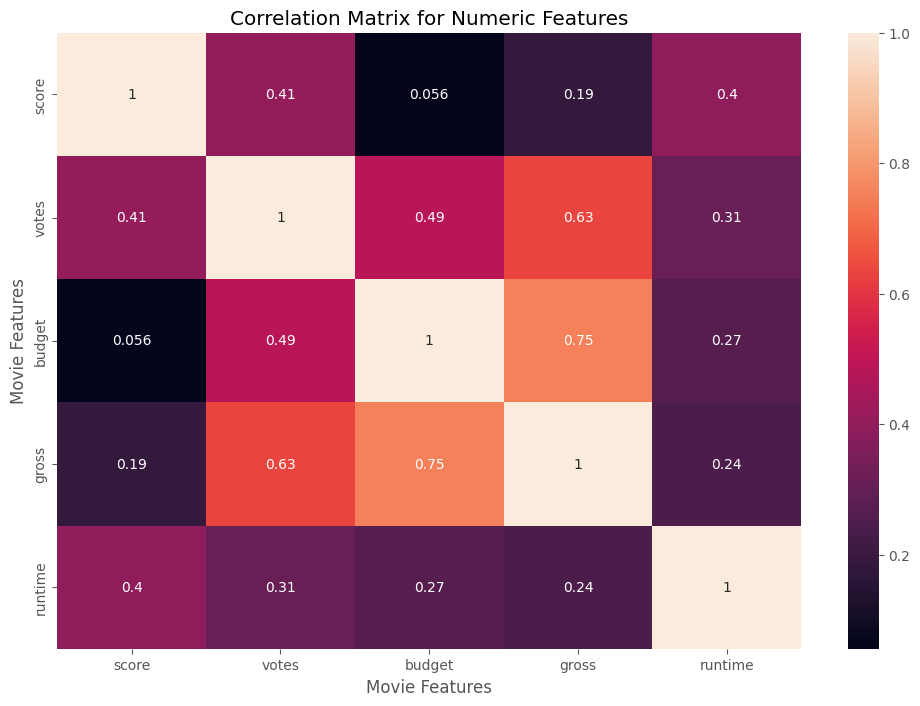

In [30]:
# Visualize Correlation Matrix for Numeric Feature Only
correlation_matrix = df.corr(numeric_only='True')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [31]:
# Looking at all Fields by turning into Numeric values
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,country,score,votes,director,writer,star,budget,gross,company,runtime
0,6587,6,6,0,1980-06-13,56,8.4,927000,2589,4014,1047,19000000,46998772,2319,146
1,5573,6,1,0,1980-07-02,56,5.8,65000,2269,1632,327,4500000,58853106,731,104
2,5142,4,0,0,1980-06-20,56,8.7,1200000,1111,2567,1745,18000000,538375067,1540,124
3,286,4,4,0,1980-07-02,56,7.7,221000,1301,2000,2246,3500000,83453539,1812,88
4,1027,6,4,0,1980-07-25,56,7.3,108000,1054,521,410,6000000,39846344,1777,98


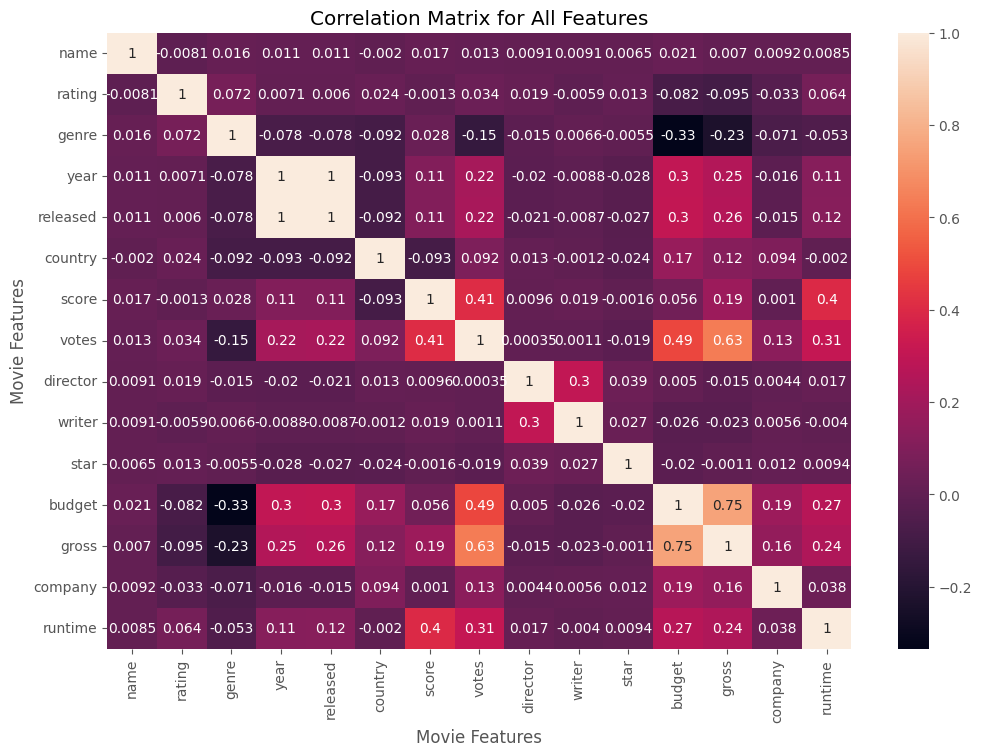

In [32]:
# Visualize Correlation Matrix for all Fields
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for All Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [33]:
# We can now take a look at the ones that have a high correlation (> 0.5)
pd.set_option('display.max_rows', 500)

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

strong_pairs = sorted_pairs[(abs(sorted_pairs) < 1.0) & (abs(sorted_pairs) > 0.5) ]
strong_pairs.head()

released  gross       0.976076
gross     released    0.976076
released  name        0.960878
name      released    0.960878
          gross       0.947540
dtype: float64

## Final Thoughts: 
After further analysis we can determine that Budget and Votes have the highest correlation to Gross earning